In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [2]:
heart_csv_path = 'C:/Users/Rawan Alamily/Downloads/McSCert Co-op/explainable-ai-heart/base-model2/data/heart2.csv'
dataframe = pd.read_csv(heart_csv_path)
dataframe.describe()

,bmi,physicalHealth,mentalHealth,sleepHours
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [4]:
dataframe['target'] = np.where(dataframe['heartDisease']=='Yes', 1, 0)
dataframe = dataframe.drop(columns=['heartDisease'])
dataframe.describe()

,bmi,physicalHealth,mentalHealth,sleepHours,target
count,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075,0.085595
std,6.356100,7.95085,7.955235,1.436007,0.279766
min,12.020000,0.00000,0.000000,1.000000,0.000000
25%,24.030000,0.00000,0.000000,6.000000,0.000000
50%,27.340000,0.00000,0.000000,7.000000,0.000000
75%,31.420000,2.00000,3.000000,8.000000,0.000000
max,94.850000,30.00000,30.000000,24.000000,1.000000


In [5]:
# visualize data imbalance
neg, pos = np.bincount(dataframe['target'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 319795
    Positive: 27373 (8.56% of total)



In [6]:
train, val, test = np.split(dataframe.sample(frac=1), [int(0.8*len(dataframe)), int(0.9*len(dataframe))])
train_labels = np.array(train.pop('target'))
bool_train_labels = train_labels != 0
val_labels = np.array(val.pop('target'))
test_labels = np.array(test.pop('target'))
train_features = np.array(train)
val_features = np.array(val)
test_features = np.array(test)

In [7]:
import seaborn as sns

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train.columns)

bmiP = []
physicalHealthP = []

for value in pos_df['bmi']:
    bmiP.append(float(value))

for value in pos_df['physicalHealth']:
    physicalHealthP.append(int(value))

bmiN = []
physicalHealthN = []

for value in neg_df['bmi']:
    bmiN.append(float(value))

for value in neg_df['physicalHealth']:
    physicalHealthN.append(int(value))

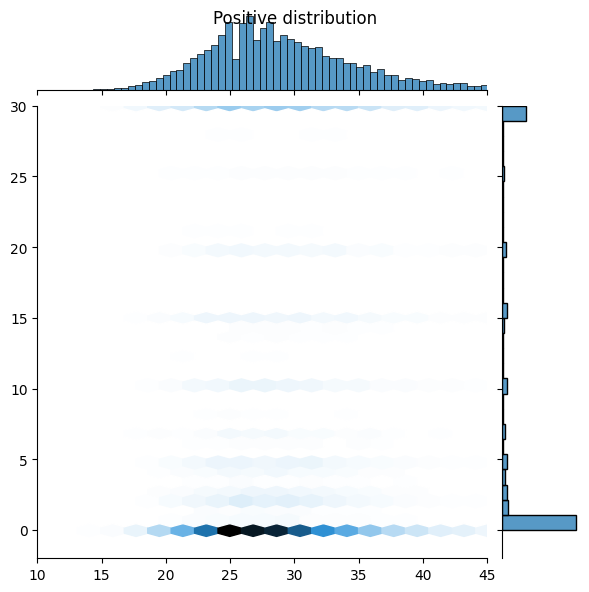

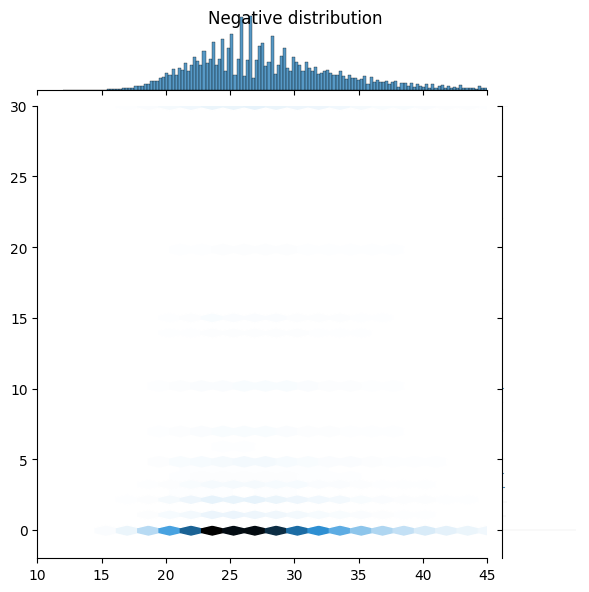

In [8]:
sns.jointplot(x=bmiP, y=physicalHealthP,
              kind='hex', xlim=(10,45), ylim=(-2,30))
plt.suptitle("Positive distribution")

sns.jointplot(x=bmiN, y=physicalHealthN,
              kind='hex', xlim=(10,45), ylim=(-2,30))
_ = plt.suptitle("Negative distribution")